# Limits of MLP for image recognition

Neural network architecture can leverage domain's specificities

MLP takes a 1D vector as an input. Images are 2D if greyscale, 3D if color.  
The color dimension is called the *channel*.

By *flattening* the image, we don't lose information, but we lose meta-information.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
import torchvision
mnist_dataset = torchvision.datasets.MNIST('./', download=True,
                                           transform=torchvision.transforms.Compose([
                                               torchvision.transforms.ToTensor(),
                                               torchvision.transforms.Normalize(
                                                 (0.1307,), (0.3081,))
                                             ]))
train_loader = torch.utils.data.DataLoader(dataset=mnist_dataset,
                                           batch_size=1, shuffle=False)
data, _ = iter(train_loader).next()
one_example = data[0]
matplotlib.rcParams['figure.figsize'] = [500, 500]

Using downloaded and verified file: ./MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./MNIST/raw/train-images-idx3-ubyte.gz
Using downloaded and verified file: ./MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz
Using downloaded and verified file: ./MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz
Using downloaded and verified file: ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


/Users/ingambe/miniforge3/envs/deep-learning/lib/python3.9/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1635217266490/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


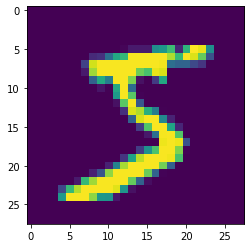

In [2]:
%matplotlib inline
plt.imshow(one_example.permute(1, 2, 0))

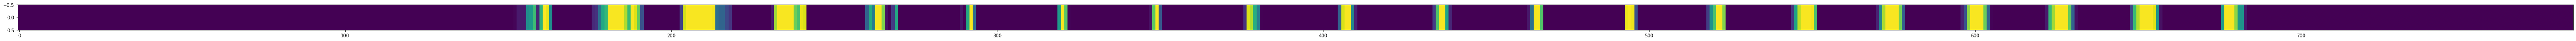

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [100, 1]
plt.imshow(one_example.view(1, 1, -1).permute(1, 2, 0), aspect='auto')

Pixels that should be close from one to another are very far apart

We can't recognize the number

Images are natural signals which have 3 properties:

* **Stationarity**: Certain motifs are repeated throughout the input.
* **Locality**: Nearby points are correlated. Meaning the information is **sparse**.
* **Compositionality**: Parts are composed of sub-parts. A deep neural network can decompose layer after layer the information. 

One huge drawback of MLP is that they are not translation *invariant*. If the images are always centered in the training set, the MLP will only focus on central pixels.